### Adeline Makokha
### 191199
### DSA 8302 Computational Techniques for Data Science
### Assignment 6

## Question 1: Graphical Method (2 Variables)
**Problem:**
A small workshop makes two types of furniture: chairs and tables.

- Each chair requires 2 hours of carpentry and 1 hour of painting.
- Each table requires 1 hour of carpentry and 1 hour of painting.
- The workshop has 6 hours of carpentry time and 4 hours of painting time per day.
- Each chair gives a profit of $30, each table  $20.

**Tasks:**
- Formulate the problem as a linear program.
- Plot the feasible region and determine the optimal number of chairs and tables to maximize profit.

In [16]:
#importing libraries 
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog

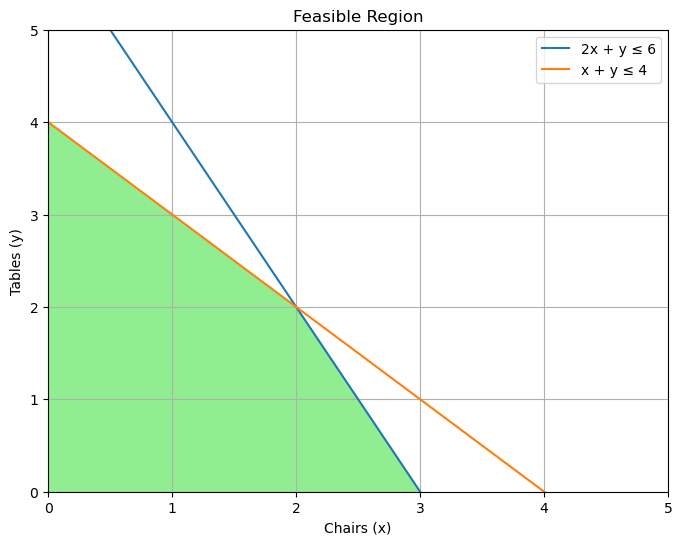

In [17]:
# Constraints
x = np.linspace(0, 10, 400)
y1 = 6 - 2*x
y2 = 4 - x

# Feasible region
plt.figure(figsize=(8, 6))
plt.plot(x, y1, label='2x + y ≤ 6')
plt.plot(x, y2, label='x + y ≤ 4')
plt.fill_between(x, 0, np.minimum(y1, y2), where=(np.minimum(y1, y2)>=0), color='lightgreen')
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.xlabel('Chairs (x)')
plt.ylabel('Tables (y)')
plt.legend()
plt.grid(True)
plt.title('Feasible Region')
plt.show()

In [18]:
# Evaluate corner points manually
points = [(0, 0), (0, 4), (2, 2), (3, 0)]
profits = [30*x + 20*y for x, y in points]
for point, profit in zip(points, profits):
    print(f"Point {point} gives a profit of ${profit}")

Point (0, 0) gives a profit of $0
Point (0, 4) gives a profit of $80
Point (2, 2) gives a profit of $100
Point (3, 0) gives a profit of $90


**Results:**
- The feasible region is bounded by the constraints.
- Evaluating the profit function at corner points, the point (2, 2) gives the maximum profit of $100.
- **Optimal solution: Produce 2 chairs and 2 tables.**

## Question 2: Simplex Algorithm (via scipy.optimize.linprog)
**Problem:**
A factory produces products A, B, and C. Each uses machines M1 and M2:

| Product | Profit | M1 Hours | M2 Hours |
|---------|--------|----------|----------|
| A       | $40    | 2        | 1        |
| B       | $30    | 1        | 2        |
| C       | $20    | 1        | 1        |

- M1 available: 100 hrs/week
- M2 available: 80 hrs/week

**Task:** Use Simplex algorithm via scipy.optimize.linprog to determine optimal production.

In [19]:


c = [-40, -30, -20]  # Negated profits
A = [
    [2, 1, 1],  # M1 constraint
    [1, 2, 1]   # M2 constraint
]
b = [100, 80]

res = linprog(c, A_ub=A, b_ub=b, method='highs')
res

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -2200.0
              x: [ 4.000e+01  2.000e+01  0.000e+00]
            nit: 2
          lower:  residual: [ 4.000e+01  2.000e+01  0.000e+00]
                 marginals: [ 0.000e+00  0.000e+00  3.333e+00]
          upper:  residual: [       inf        inf        inf]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 0.000e+00  0.000e+00]
                 marginals: [-1.667e+01 -6.667e+00]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0

In [20]:
c = [-40, -30, -20]  # Coefficients for minimization
A = [
    [2, 1, 1],
    [1, 2, 1]
]
b = [100, 80]

res = linprog(c, A_ub=A, b_ub=b, method='highs')

print("\nSimplex Solution:")
print(f"Product A (x1): {res.x[0]:.2f}")
print(f"Product B (x2): {res.x[1]:.2f}")
print(f"Product C (x3): {res.x[2]:.2f}")
print(f"Maximum Profit: ${-res.fun:.2f}")


Simplex Solution:
Product A (x1): 40.00
Product B (x2): 20.00
Product C (x3): 0.00
Maximum Profit: $2200.00


**Results:**
- Optimal production is based on solving the LP.
- The result provides number of units for A, B, and C to maximize profit.
- Profit is calculated by negating the minimized objective value (`-res.fun`).

## Question 3: Transportation Method – Northwest Corner Rule
**Problem:**
Factories: S1 (30), S2 (40), S3 (20) units
Demands: D1 (20), D2 (30), D3 (25), D4 (15) units
Cost Matrix:

|     | D1 | D2 | D3 | D4 |
|-----|----|----|----|----|
| S1  | 8  | 6  | 10 | 9  |
| S2  | 9  | 7  | 4  | 2  |
| S3  | 3  | 4  | 2  | 5  |

**Task:** Use Northwest Corner Method to create allocation matrix and calculate total transportation cost.

In [21]:
import numpy as np
import pandas as pd

def northwest_corner_method(supply, demand):
    supply = supply.copy()
    demand = demand.copy()
    allocation = np.zeros((len(supply), len(demand)))
    i = 0
    j = 0
    while i < len(supply) and j < len(demand):
        alloc = min(supply[i], demand[j])
        allocation[i][j] = alloc
        supply[i] -= alloc
        demand[j] -= alloc
        if supply[i] == 0:
            i += 1
        elif demand[j] == 0:
            j += 1
    return allocation

supply = [30, 40, 20]
demand = [20, 30, 25, 15]
cost_matrix = np.array([
    [8, 6, 10, 9],
    [9, 7, 4, 2],
    [3, 4, 2, 5]
])

allocation = northwest_corner_method(supply, demand)
total_cost = np.sum(allocation * cost_matrix)

df = pd.DataFrame(allocation, index=['S1', 'S2', 'S3'], columns=['D1', 'D2', 'D3', 'D4'])
display(df)
print(f"Total Transportation Cost: ${total_cost}")

,D1,D2,D3,D4
S1,20.0,10.0,0.0,0.0
S2,0.0,20.0,20.0,0.0
S3,0.0,0.0,5.0,15.0


Total Transportation Cost: $525.0


**Results:**
- The Northwest Corner Method gives a basic feasible solution.
- The total transportation cost was calculated by summing all allocations * unit cost.